In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('train.csv', header = 0)

In [3]:
df.shape
df.columns
pddf = pd.DataFrame()

## 1.At first I decided to analysis the relationship between the people survived and the class that there were selected.

In [4]:
pddf['Survived'] = df[['Pclass','Survived']].groupby(['Pclass'])['Survived'].sum()
pddf['PassengerNum'] = df[['Pclass','Survived']].groupby(['Pclass'])['Survived'].count()

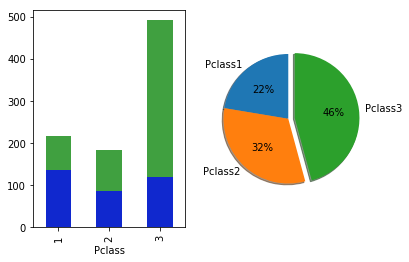

In [232]:

deadnum = pddf.PassengerNum - pddf.Survived
rate = deadnum / pddf.PassengerNum
plt.subplot(121)
pddf.PassengerNum.plot(kind='bar',color='g',alpha=0.75)
pddf.Survived.plot(kind='bar',color='b',alpha=0.75)

plt.subplot(122)
explode = (0,0,0.1)
plt.pie(rate,explode=explode,labels=['Pclass1','Pclass2','Pclass3'],
        autopct='%1.0f%%',shadow=True, startangle=90)
plt.axis('equal')

plt.show()



### From the resule of the pie draft we can get the information that the death rate related to the pclass of people selected. 

In [233]:
pddf['Survivedage'] = df[['Age','Survived']].groupby(['Age'])['Survived'].sum()
pddf['PassengerNumage'] = df[['Age','Survived']].groupby(['Age'])['Survived'].count()

## 2.At second, i try to find the relationship between the age and the death 

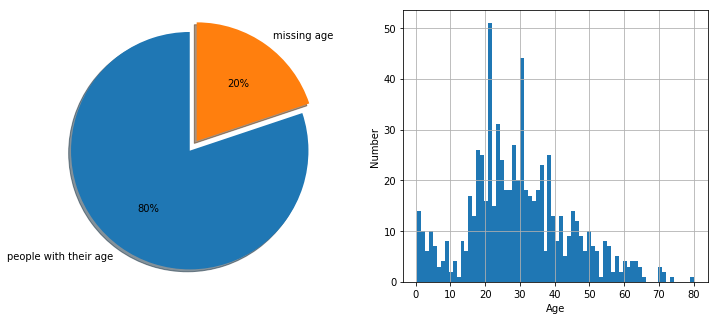

The average is
29.69911764705882


AttributeError: 'Series' object has no attribute 'boxplot'

In [235]:
agegroup = df.Age
agegroup.sum()
peoplewithage = agegroup.dropna()
len(agegroup.dropna())
agewithname = len(agegroup.dropna()) / len(agegroup)
agewithoutname = 1 - agewithname
averageage = agegroup.sum() / len(agegroup.dropna())

plt.subplot(121)
rate = [agewithname, agewithoutname]
explode = (0,0.1)
plt.pie(rate,explode=explode,labels=['people with their age','missing age'],
        autopct='%1.0f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.show()

print('The average is')
print(averageage)
plt.figure(figsize=(12,5))
plt.subplot(122)
peoplewithage.hist(bins = 70)
plt.xlabel('Age')
plt.ylabel('Number')
peoplewithage.boxplot()



### There are a lot of missing data in the list so the first stap is to fill those data and i calculated the average age of other peole and using those average age data to fill in the gap to get the new data, from those drafts we can know that the majority of the death age were young person.

## 3.This part is to find the relationship between different Pclass and age contribute to the death.

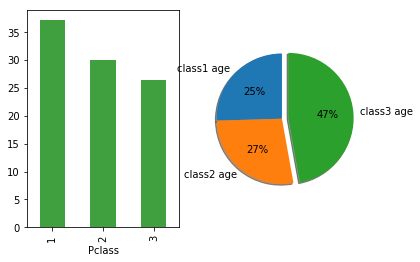

In [237]:

agesexclassdata = df.drop(['PassengerId','SibSp','Parch',
                           'Fare','Cabin','Embarked','Name','Ticket'],
                          axis = 1)
cleandata = agesexclassdata.fillna(averageage)

plt.subplot(121)
pclassandage = cleandata.groupby(['Pclass'])['Age'].sum()
pclassandagenum = cleandata.groupby(['Pclass'])['Age'].count()
pclassandagesur = cleandata.groupby(['Pclass'])['Survived'].sum()
datapa1 = pclassandage / pclassandagenum
datapa2 = pclassandage / pclassandagesur
datapa1.plot(kind='bar',color='g',alpha=0.75)

plt.subplot(122)
explode = (0,0,0.1)
plt.pie(datapa2,explode=explode,labels=['class1 age','class2 age','class3 age'],
        autopct='%1.0f%%',shadow=True, startangle=90)
plt.axis('equal')


plt.show()


### From this part, the first step is to clean the data because there are a lot of useless data in the list and fill the gap by the average data and calculate the average age in each pclass and get the death rate.

## 4.This part is to consider the relationship between the ticket fare.

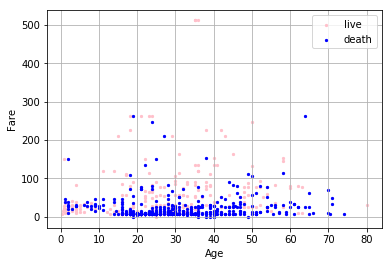

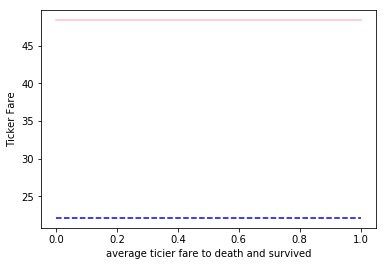

In [238]:
farewithsur = df.Fare[df.Survived==1]
farewithdea = df.Fare[df.Survived==0]
listlengthsur = len(farewithsur)
listlengthdea = len(farewithdea)

farewithsur.sum()
farewithdea.sum()
averagedeathfare = farewithdea.sum() / listlengthdea 
averagesurvivedfare = farewithsur.sum() / listlengthsur

fig, da = plt.subplots()

ysur = df.Fare[df.Survived==1]
ydea = df.Fare[df.Survived==0]
xsur = df.Age[df.Survived==1]
xdea = df.Age[df.Survived==0]

m = da.scatter(xsur, ysur, 5, 'pink')
da.hold
n = da.scatter(xdea, ydea, 5, 'blue')
da.hold

da.set_ylabel('Fare')
da.set_xlabel('Age')

da.legend([m,n],['live','death'])
da.grid(True)
plt.show()

plt.plot([averagedeathfare,averagedeathfare],color='blue',linestyle="--",label='average death fare')
plt.plot([averagesurvivedfare,averagesurvivedfare],color='pink',linestyle='-', label='average survived fare')

plt.ylabel('Ticker Fare')
plt.xlabel('average ticier fare to death and survived')



plt.show()




### This image shows the relationship between ticket fare and death rate and the high ticket fare have high survive rate.